In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [6]:
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [7]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [8]:
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

def linear_regression(inputs):
    return inputs*W +b

def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2*n_samples)

In [10]:
#SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

#Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)



In [16]:
# Initial cost, befor optimizing
print("Initial cost = {:.9f} W={} b={}".format(
    mean_square_fn(linear_regression,train_X, train_Y),
     W.numpy(), b.numpy()))

for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))
    
    if (step +1) % display_step ==0 or step == 0:
        print('epoch: %04d, cost=%.9f, W=%f, =%f' % 
             (step+1,mean_square_fn(linear_regression, train_X,train_Y), W.numpy(), b.numpy()))
        
        


Initial cost = 1.287954211 W=0.3316017687320709 b=1.845678687095642
epoch: 0001, cost=0.485597044, W=0.230981, =1.830229
epoch: 0100, cost=0.126984999, W=0.124791, =1.698065
epoch: 0200, cost=0.116189890, W=0.139298, =1.595216
epoch: 0300, cost=0.107722856, W=0.152146, =1.504130
epoch: 0400, cost=0.101081751, W=0.163525, =1.423460
epoch: 0500, cost=0.095872879, W=0.173602, =1.352017
epoch: 0600, cost=0.091787435, W=0.182527, =1.288746
epoch: 0700, cost=0.088582985, W=0.190431, =1.232710
epoch: 0800, cost=0.086069636, W=0.197431, =1.183084
epoch: 0900, cost=0.084098354, W=0.203630, =1.139133
epoch: 1000, cost=0.082552165, W=0.209120, =1.100209


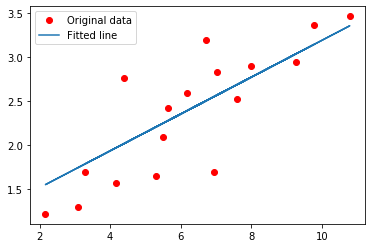

In [17]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W*train_X+b),  label='Fitted line')
plt.legend()
plt.show()
